In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [30]:
df = pd.read_csv('/USERS/ADMIN/CE/SAA/REGRESION_LINEAL/EJERS/Salary_dataset (1).csv')


In [31]:


df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# EDA

In [32]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [33]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [34]:
#VEURE EL TOTAL DE NULS DE CADA COLUMNA/VARIABLE

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [35]:
#elimina els valors duplicats
df.drop_duplicates(inplace= True)

In [36]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Text(0, 0.5, 'Salary')

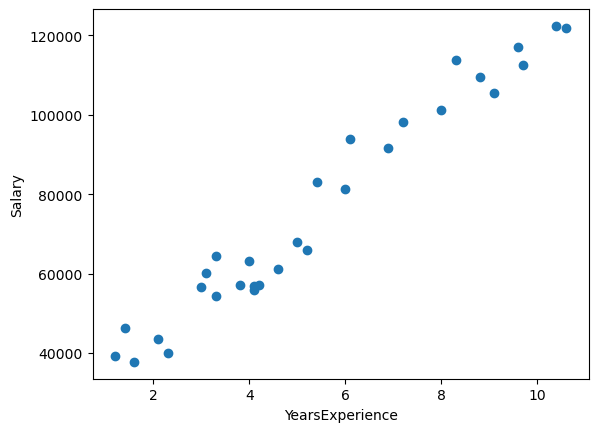

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Linear Regression 

In [38]:
from sklearn import metrics, linear_model, model_selection

1: ASIGNAR VARIABLE INDEPENDIENTE Y DEPENDIENTE(OBJETIVO)


In [39]:

x = df.drop(columns = ['Salary']) #crea un nuevo DataFrame llamado x que contiene todas las columnas de df excepto la columna 'Salary'.
y = df['Salary'] # Esta línea asigna a y solo la columna 'Salary' de df VARIABLE OBJETIVO 

x.shape, y.shape

((30, 1), (30,))

In [40]:
y=y.values.reshape(-1,1) # Con reshape(-1, 1), conviertes el array unidimensional en un array bidimensional con una sola columna.
y.shape

(30, 1)

In [41]:
from sklearn import preprocessing 

#Inicializar el escalador MinMaxScaler:  
#Esta clase se utiliza para escalar las características a un rango específico, típicamente [0, 1].
scaler = preprocessing.MinMaxScaler()


x = scaler.fit_transform(x) #Escala las características al rango [0, 1] y asigna el resultado a x.
y = scaler.fit_transform(y) #y: Escala la variable objetivo al rango [0, 1] (aunque esto puede no ser

2- DIVISION DATOS

In [53]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#Conjunto de entrenamiento: Para entrenar el modelo (90% de los datos).
#Conjunto de prueba: Para evaluar el modelo (10% de los datos).

#test_size=0.1: Indica que el 10% de los datos se reservarán para el conjunto de prueba.
#random_state=42: Establece una semilla para que la división sea reproducible. Si vuelves a ejecutar el código, obtendrás la misma división.



In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27, 1), (3, 1), (27, 1), (3, 1))

3- CREACIÓN MODELO Y TRAIN

In [55]:
#linear_model.LinearRegression(): Esta línea crea una instancia del modelo de regresión lineal.
#linear_model: Es un módulo de scikit-learn que contiene clases para modelos de regresión.
#LinearRegression(): Es la clase específica para crear un modelo de regresión lineal.

lr_model = linear_model.LinearRegression()


lr_model.fit(x_train,y_train)
#fit(): Este método se usa para entrenar el modelo con los datos que le proporciones.

LinearRegression()

In [56]:
y_pred = lr_model.predict(x_test) 
#Este es el nombre de la variable donde se almacenarán las predicciones que el modelo
#Esta es la variable que contiene tu modelo de regresión lineal
#Es un método del modelo de regresión lineal que utiliza las características del conjunto de prueba (x_test) para generar predicciones

In [60]:
r2score = metrics.r2_score(y_test, y_pred)
#accuracy = metrics.accuracy_score(y_test, y_pred) #Models de classificació, no regressió!
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(" Linear Regression Model Accuracy = ", r2score*100, "%")
print("Mean Absolute Error = ", MAE)
print("Mean Squared Error = ", MSE)



 Linear Regression Model Accuracy =  89.28775350863083 %
Mean Absolute Error =  0.07235329963521235
Mean Squared Error =  0.006814748348212396
